Extract the data from the amazon_sales_net_revenue.csv file.

Construct a function of the kind $f(x) = ae^{bx}$ to approximate the data using the least squares method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
sys.path.append('../util')

from least_squares_method import least_squares_method_function

In [3]:
file = pd.read_csv('../data/amazon_sales_net_revenue.csv')

In [4]:
nodes = file.loc[:, 'year']
values = file.loc[:, 'revenue']

In [5]:
desired_func = lambda arr, x: arr[0] + arr[1] * x

objective_function = lambda params, f, nodes, values: sum(
    (f(params, nodes[i]) - np.log(values[i]) ** 2) for i in range(nodes.size)
)

output_function = lambda params, x: np.exp(params[0] + params[1] * x)

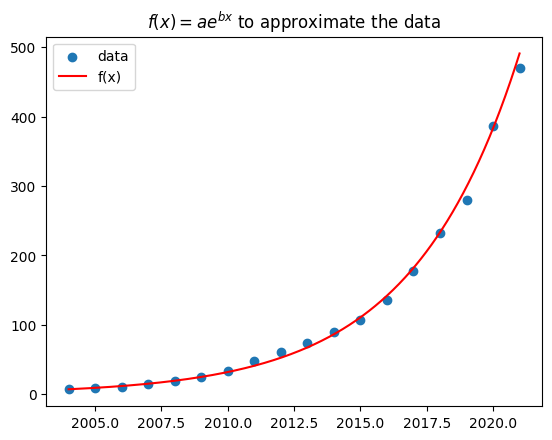

In [6]:
x_axis = np.linspace(nodes.min(), nodes.max(), 600)

plt.scatter(nodes, values)
plt.plot(x_axis, least_squares_method_function(
    nodes,
    np.log(values),
    x_axis,
    2,
    desired_kind_function=desired_func,
    objective_func=objective_function,
    output_func=output_function
), color='red')
plt.title('$f(x) = a e^{b x}$ to approximate the data')
plt.legend(['data', 'f(x)'])
plt.show()